In [2]:
# create image classfication using Convolution Neural Network
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from tqdm import tqdm
import cv2

In [2]:
# define variables
image_size = (150, 150)
class_names = ['Bed', 'Chair', 'Sofa']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}
class_length = len(class_names)
print(class_labels)

{'bed': 0, 'chair': 1, 'sofa': 2}


In [7]:
# mobilenet CNN model
from keras.applications.mobilenet_v2 import MobileNetV2
model = MobileNetV2(weights = 'imagenet')

14536120/14536120 [==============================] - 1s 0us/step


In [51]:
img_dir = "images"
i = 0
data = np.empty((300, 224, 224, 3))

for image_class in os.listdir(img_dir): 
    for image in os.listdir(os.path.join(img_dir, image_class)):
        image_path = os.path.join(img_dir, image_class, image)        
        img = cv2.imread(image_path)
        

In [85]:
# scale data
data = tf.keras.utils.image_dataset_from_directory('images', label_mode='categorical')

Found 300 files belonging to 3 classes.


In [86]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [87]:
# split data into train/val/test
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [88]:
# Build model with Conv2d Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [89]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [90]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 21s 2s/step - loss: 2.7201 - accuracy: 0.4196 - val_loss: 0.9101 - val_accuracy: 0.6719
Epoch 2/20
7/7 [==============================] - 16s 2s/step - loss: 0.9707 - accuracy: 0.6295 - val_loss: 0.7474 - val_accuracy: 0.8438
Epoch 3/20
7/7 [==============================] - 15s 2s/step - loss: 0.6845 - accuracy: 0.8214 - val_loss: 0.4563 - val_accuracy: 0.8750
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.3630 - accuracy: 0.8839 - val_loss: 0.2259 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 19s 2s/step - loss: 0.1902 - accuracy: 0.9375 - val_loss: 0.4869 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 19s 2s/step - loss: 0.1775 - accuracy: 0.9509 - val_loss: 0.1811 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 21s 3s/step - loss: 0.1036 - accuracy: 0.9509 - val_loss: 0.0913 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

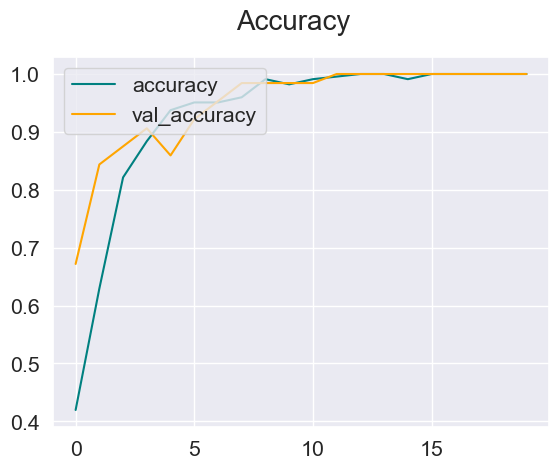

In [91]:
# plot accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

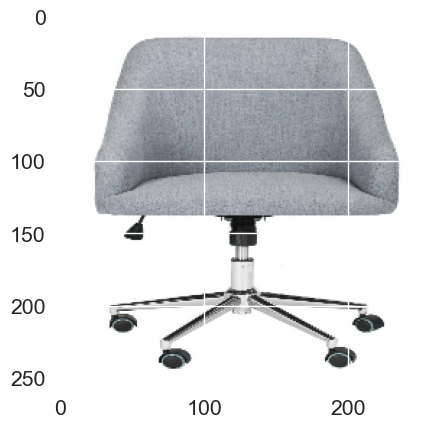

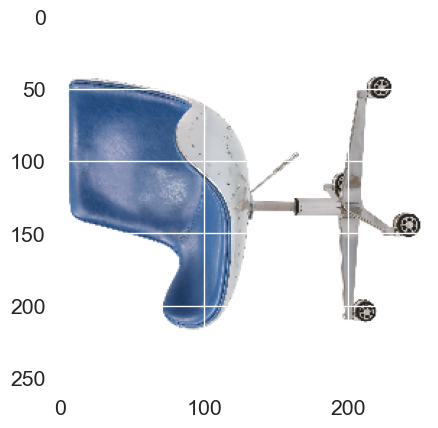

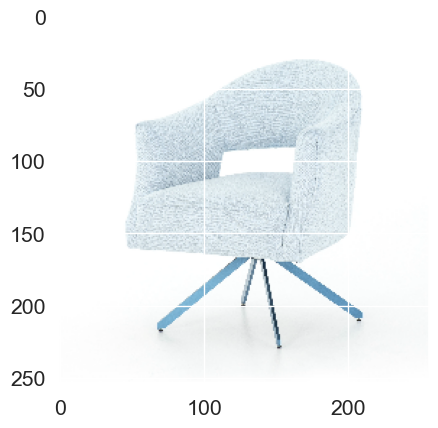

In [99]:
img = cv2.imread('C:/Users/jaylo/OneDrive/Documents/school/job applications/Fulhaus_Aptitude_Test_Zhelong/fulhaus_test/images/Chair/ADRIENNE LINEN CHROME LEG SWIVEL OFFICE CHAIR.jpg')
img1 = cv2.imread('C:/Users/jaylo/OneDrive/Documents/school/job applications/Fulhaus_Aptitude_Test_Zhelong/fulhaus_test/images/Chair/Abner PU Swivel Chair.jpg')
img2 = cv2.imread('C:/Users/jaylo/OneDrive/Documents/school/job applications/Fulhaus_Aptitude_Test_Zhelong/fulhaus_test/images/Chair/Adara Desk Chair-Knoll Natural.jpg')


In [102]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 152ms/step


In [103]:
# 0 for bed
# 1 for chair
# 2 for sofa
if (yhat.argmax() == 0):
    print('Predicted bed')
elif (yhat.argmax() == 1):
    print('Predicted chair')
elif (yhat.argmax() == 2):
    print('Predicted sofa')

Predicted chair


In [107]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))

In [111]:
new_model = load_model('models/imageclassifier.h5')

In [113]:
import pickle
pickle.dump(new_model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    